__«Моделирование вкладов физических лиц»__

__Задача:__ построить и описать модель, где целевой переменной (таргетом) являются помесячные изменения объемов рынка вкладов физических лиц РФ в рублях, которая будет объяснима с точки зрения экономической логики. Дополнительно требуется построить прогноз таргета на 01.2017 – 12.2017.

__Данные:__ в файле xls представлены данные по изменениям объемов вкладов физических лиц в рублях в РФ, а также ставки по продукту, связанным с ним продуктам и макроэкономические показатели. В качестве объясняющих факторов можно использовать как показатели, представленные в базе, так и самостоятельно найденные показатели (например, на сайте Росстата или ЦБ).

__Модель:__ оценивание можно проводить с помощью любых моделей (методов и алгоритмов), однако, они должны показывать, как хорошее качество с точки зрения описания взаимосвязей, так и высокую предсказательную силу на будущий период. Так же модель должна давать согласующиеся с экономической логикой зависимости.

__Формат отчета:__ Моделирование можно делать в любом статистическом пакете или среде программирования. На выходе нужно предоставить jupyter_notebook / rmarkdown / аналог с понятным описанием логики построения модели и интерпретацией результатов или аналог в doc / ppt / pdf / html

Чтение данных и импорт нужных библиотек:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

%pylab inline
import warnings
import itertools
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

sns.set(style="darkgrid")
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_excel('C:/Users/DariaMishina/ML Daria/BST_DataSet.xlsx')

1. Осмотр данных;
2. Первичный анализ данных в столбцах (распределение признака для числовых переменных, количество и каунты уникальных значений для номинативных переменных (при наличии); поиск и устранение выбросов; приведение данных в нужную форму если это нужно);
3. Корреляционный анализ количественных переменных, отбор некоррелирующих переменных;
4. Feature Engineering
5. Построение модели
6. Кросс-валидация
7. Прогноз
8. Точки роста для проекта

# Осмотр данных

In [3]:
display(df.head(10))
df.info()

,Unnamed: 0,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
0,2011-01-01,-79049.0,5.244667,7.75,2.9,4.5,96.29,106.17151,5532900.0,19307.7,30.08,20669
1,2011-02-01,180475.0,5.144211,8.00,3.1,4.4,103.96,106.99964,5613700.0,19536.7,29.29,20680
2,2011-03-01,106845.0,5.021364,8.00,3.1,4.2,114.44,107.66304,5647000.0,19788.7,28.43,22673
3,2011-04-01,224890.0,4.558571,8.00,2.6,4.1,123.15,108.12599,5863400.0,20020.8,28.10,22519
4,2011-05-01,45856.0,4.795000,8.25,2.6,4.1,114.46,108.64500,5893400.0,20160.9,27.87,22779
5,2011-06-01,227020.0,4.934762,8.25,2.6,4.2,113.76,108.89488,6017200.0,20721.9,27.98,24137
6,2011-07-01,133756.0,4.777619,8.25,2.6,4.0,116.46,108.88399,6151200.0,20828.1,27.90,23598
7,2011-08-01,10165.0,5.215217,8.25,2.6,4.1,110.08,108.62267,6204500.0,21061.9,28.77,23051
8,2011-09-01,45398.0,5.873636,8.25,2.5,4.0,110.88,108.57922,6303700.0,21480.4,30.49,23468
9,2011-10-01,17145.0,6.443810,8.25,2.9,4.5,109.47,109.10040,6349700.0,21366.7,31.35,23602


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Unnamed: 0                                         84 non-null     datetime64[ns]
 1   Прирост вкладов физических лиц в рублях (млн руб)  72 non-null     float64       
 2   Доходность ОФЗ по сроку до 1 года                  84 non-null     float64       
 3   Ключевая ставка                                    84 non-null     float64       
 4   Ставка по вкладам в долларах до 1 года             84 non-null     float64       
 5   Ставка по вкладам в рублях до 1 года               84 non-null     float64       
 6   Нефть марки Юралс, долл./барр                      84 non-null     float64       
 7   Индекс потребительских цен, ед.                    84 non-null     float64       
 8   М0, руб               

Датасет состоит из 84 наблюдений, в датасете 12 колонок, 11 из которых числовые и 1 - datatime. Во всех столбцах, кроме _Прирост вкладов физических лиц в рублях (млн руб)_ , отсутствуют пустые значения, но для указанного столбца, являющегося таргетом, это не пропуск, а те данные, которые нужно предсказать. Поэтому пропуски заполнять не нужно

У самого первого стобца некорректное название, поэтому присвоим его сами и заодно еще раз обозначим все названия стобцов, чтобы не было в дальнейшем проблем

In [3]:
df.columns = ['Дата', 'Прирост вкладов физических лиц в рублях (млн руб)',
              'Доходность ОФЗ по сроку до 1 года', 'Ключевая ставка',
              'Ставка по вкладам в долларах до 1 года',
              'Ставка по вкладам в рублях до 1 года', 'Нефть марки Юралс, долл./барр',
              'Индекс потребительских цен, ед.', 'М0, руб', 'М2, руб',
              'Курс доллара к рублю, руб', 'Номинальная средняя з/п, руб']

Переименуем индексы строк в даты, а столбец Дата удалим вообще

In [4]:
df = df.set_index(pd.DatetimeIndex(df['Дата']))
df.drop(['Дата'], axis=1, inplace=True)

Отделим те наблюдения, значения таргета для которых надо предсказать - _df_predict_ от основной массы наблюдений

In [5]:
df_predict = df[72:]

In [6]:
df = df[:72]

# Первичный анализ данных в столбцах

Напишем функцию, которая покажет нам распределение признаков и покажет выбросы для столбцов, у которых определены значения 

In [9]:
def first_look(col, boundaries=None):
    print('Столбец', col)
    print('Распределение признака:')
    fig, ax = plt.subplots()
    # Проверка на строковый тип данных
    if df.loc[:, col].dtypes == np.dtype('O'):
        sns.countplot(df.loc[:, col], ax=ax)
        plt.show()
    else:

        df.loc[:, col].hist(ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('count')
        plt.show()
        if boundaries is not None:  # Проверка на наличие выбросов по информации из датасета
            if df.loc[(~df.loc[:, col].between(boundaries[0], boundaries[1])) &
                      pd.notnull(df.loc[:, col])].shape[0] > 0:
                print('Найдены выбросы:')
                display(df.loc[(~df.loc[:, col].between(boundaries[0], boundaries[1])) &
                               pd.notnull(df.loc[:, col])])
    print()

Распеределение и выбросы у столбца дата смотреть не будем, сделаем это для всех остальных признаков и таргета

Столбец Прирост вкладов физических лиц в рублях (млн руб)
Распределение признака:


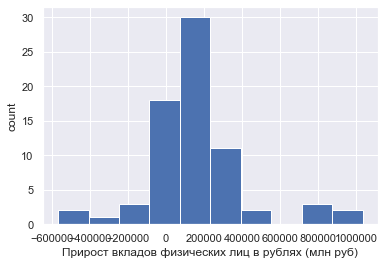


Столбец Доходность ОФЗ по сроку до 1 года
Распределение признака:


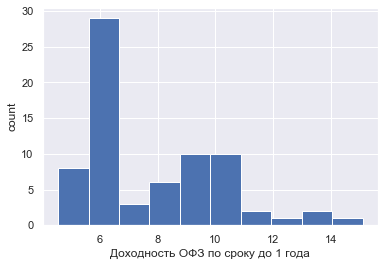


Столбец Ключевая ставка
Распределение признака:


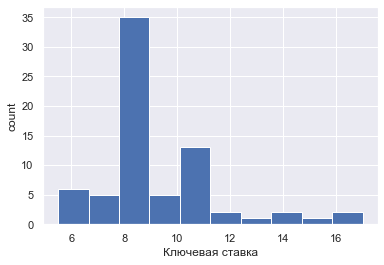


Столбец Ставка по вкладам в долларах до 1 года
Распределение признака:


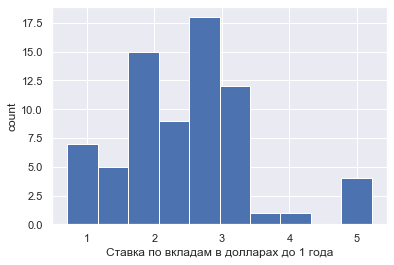


Столбец Ставка по вкладам в рублях до 1 года
Распределение признака:


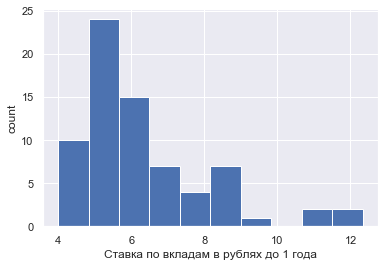


Столбец Нефть марки Юралс, долл./барр
Распределение признака:


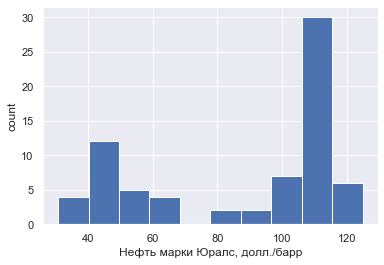


Столбец Индекс потребительских цен, ед.
Распределение признака:


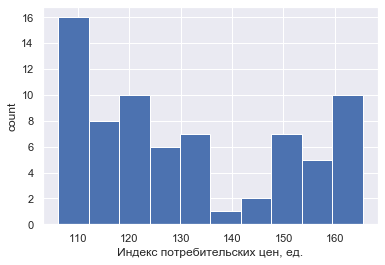


Столбец М0, руб
Распределение признака:


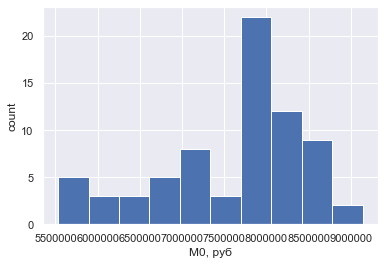


Столбец М2, руб
Распределение признака:


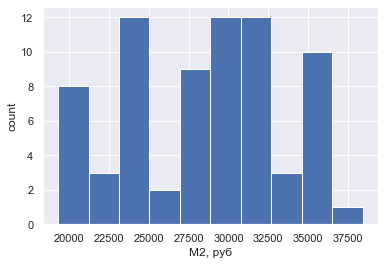


Столбец Курс доллара к рублю, руб
Распределение признака:


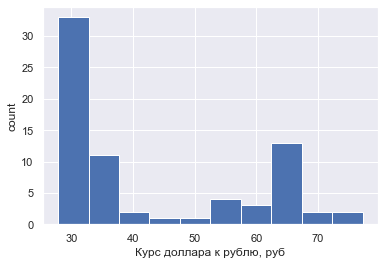


Столбец Номинальная средняя з/п, руб
Распределение признака:


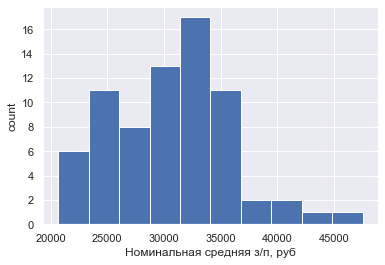

In [10]:
first_look('Прирост вкладов физических лиц в рублях (млн руб)')
first_look('Доходность ОФЗ по сроку до 1 года')
first_look('Ключевая ставка')
first_look('Ставка по вкладам в долларах до 1 года')
first_look('Ставка по вкладам в рублях до 1 года')
first_look('Нефть марки Юралс, долл./барр')
first_look('Индекс потребительских цен, ед.')
first_look('М0, руб')
first_look('М2, руб')
first_look('Курс доллара к рублю, руб')
first_look('Номинальная средняя з/п, руб')

В целом данные достаточно чистые. Отсутствие пропусков мы отследили ранее, выбросов тоже нет. В датасете есть признаки разного масштаба, поэтому применим стандартизацию. Также распределение не всех признаков нормальное, есть перепады, поэтому попробуем несколько способов для уменьшения перепадов и сглаживания "хвоста".

## Пробуем сделать распределение данных «нормальным» 

Многие алгоритмы работают лучше, когда на вход принимают нормально распределённые данные. Один из способов сделать данные «нормальными» — взять логарифм. При этом не должно быть значений равных 0, иначе метод np.log выдаст бесконечность. 

Проверим, есть ли нулевые значения

In [11]:
df.describe()

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
count,7.200000e+01,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,7.200000e+01,72.000000,72.000000,72.000000
mean,1.466405e+05,7.845004,9.145833,2.432361,6.296111,87.857639,131.484756,7.593138e+06,28555.823611,43.112639,30675.041667
std,2.593857e+05,2.359552,2.375695,1.000053,1.858968,29.884173,19.802619,8.700963e+05,5037.525194,15.763443,5451.277321
min,-5.674480e+05,4.558571,5.500000,0.710000,4.000000,30.800000,106.171510,5.532900e+06,19307.700000,27.870000,20669.000000
25%,1.949025e+04,6.135143,8.000000,1.752500,5.200000,55.360000,114.621930,7.086675e+06,24300.775000,31.032500,26561.250000
50%,1.129245e+05,6.547364,8.250000,2.550000,5.705000,105.470000,125.209420,7.901050e+06,29675.250000,33.240000,30957.500000
75%,2.360528e+05,9.630476,10.625000,2.925000,6.920000,110.692500,151.169625,8.204450e+06,31987.100000,61.820000,33880.000000
max,1.034556e+06,15.098421,17.000000,5.220000,12.330000,124.930000,165.409180,9.139800e+06,38418.000000,77.220000,47554.000000


Нулевых значений ни у признаков, ни у таргета нет, поэтому попробуем прологарифмировать некоторые из признаков и оценим их распределение после этого

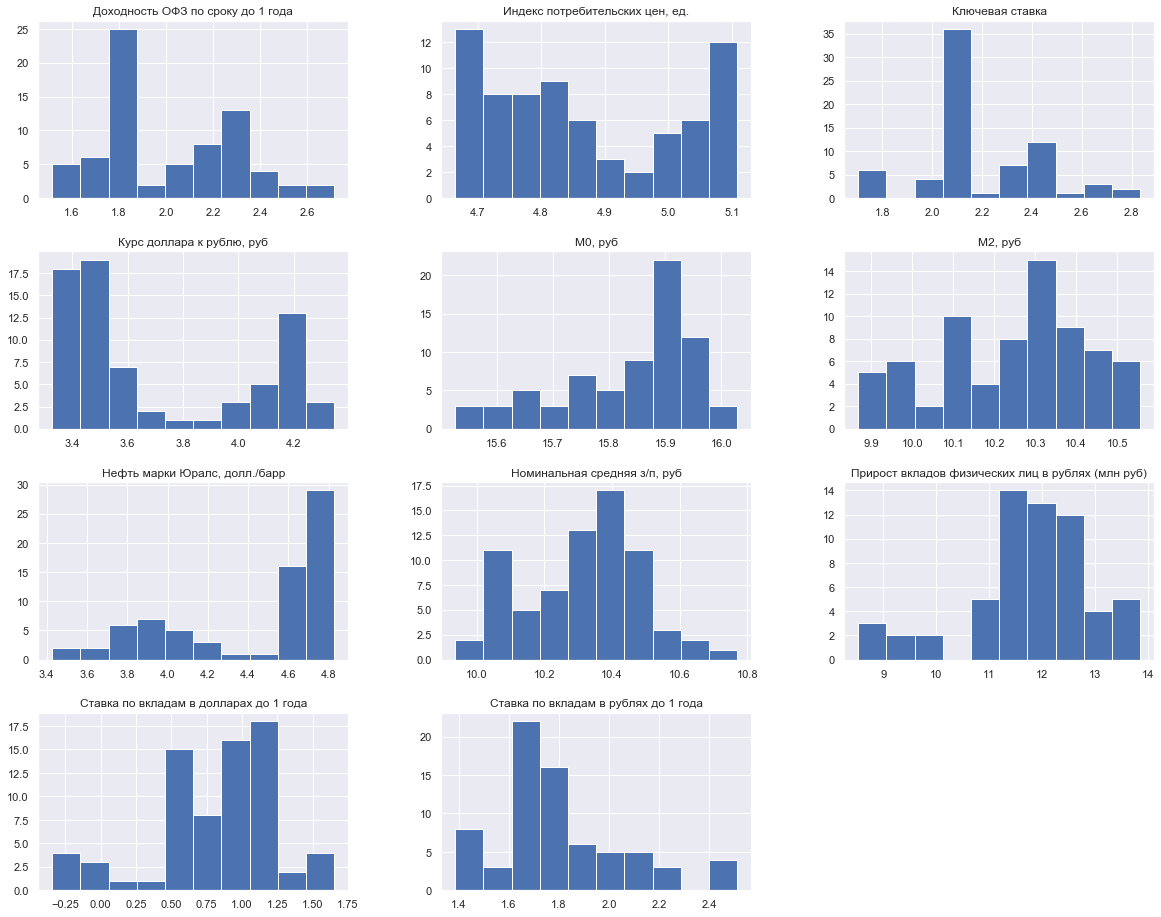

In [45]:
df.apply(lambda w: np.log(w)).hist(figsize=(20,16));

После логарифмирования распределение не стало стало у некоторых признаков лучше, попробуем извлечь корень квадратный и оценить получивашееся распределение снова

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


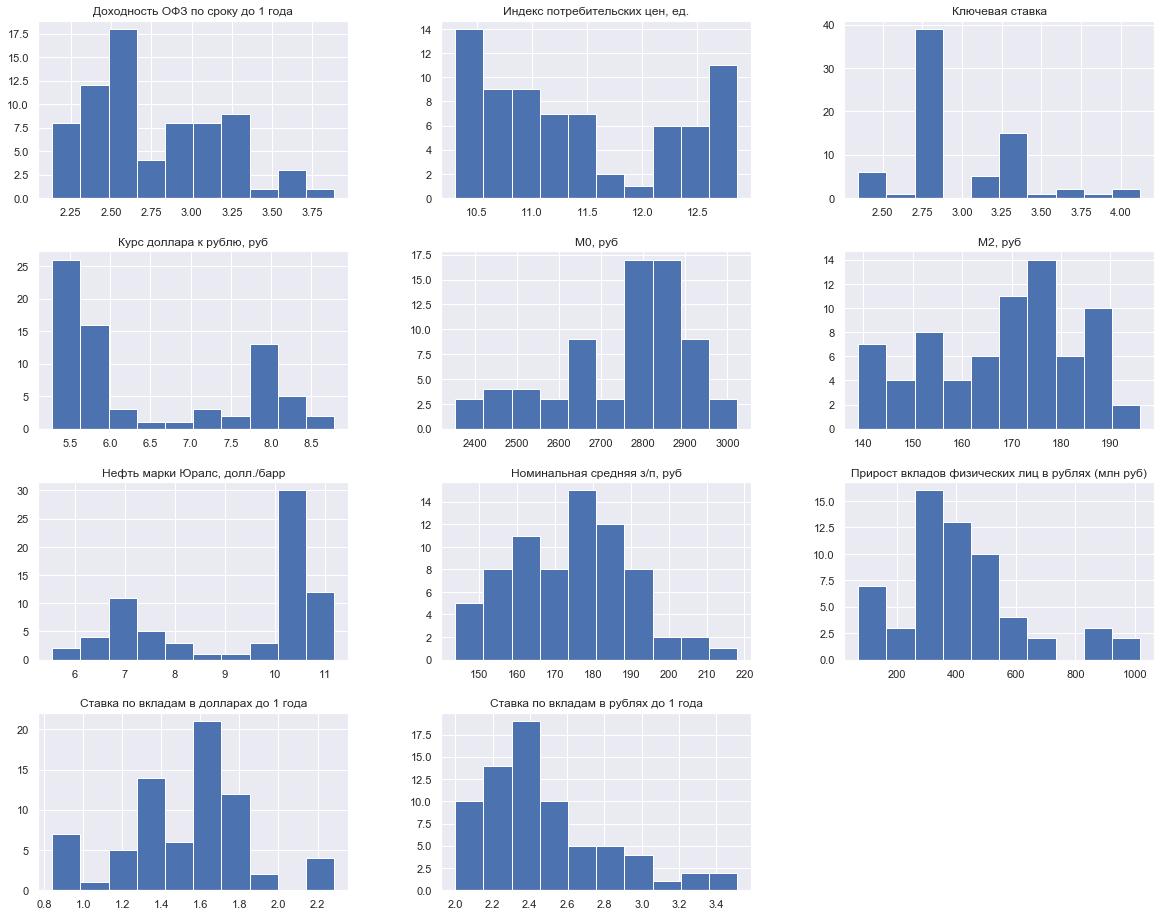

In [47]:
df.apply(lambda w: np.sqrt(w)).hist(figsize=(20,16));

Распределение стало выглядеть лучше после извлечения квадратного корня для стоблцов _Доходность ОФЗ по сроку до 1 года_ , _Ставка по вкладам в рублях до 1 года_ и _Номинальная средняя з/п, руб_ и после логарифмирования для столбцов _М0, руб_ и _М2, руб_ Перезапишем датафрейм для этих признаков

In [7]:
df['Доходность ОФЗ по сроку до 1 года'] = df['Доходность ОФЗ по сроку до 1 года'].apply(
    lambda w: np.sqrt(w))
df['Ставка по вкладам в рублях до 1 года'] = df['Ставка по вкладам в рублях до 1 года'].apply(
    lambda w: np.sqrt(w))
df['Номинальная средняя з/п, руб'] = df['Номинальная средняя з/п, руб'].apply(
    lambda w: np.sqrt(w))
df['М0, руб'] = df['М0, руб'].apply(lambda w: np.log(w))
df['М2, руб'] = df['М2, руб'].apply(lambda w: np.log(w))

# Корреляционный анализ

Используем для наглядности матрицу корреляций:

In [8]:
df.corr()

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
Прирост вкладов физических лиц в рублях (млн руб),1.000000,0.009066,0.048946,-0.012823,0.069823,-0.077074,0.098694,0.151430,0.123343,0.077381,0.384963
Доходность ОФЗ по сроку до 1 года,0.009066,1.000000,0.842034,0.049513,0.906115,-0.840938,0.822172,0.692499,0.753568,0.846238,0.690284
Ключевая ставка,0.048946,0.842034,1.000000,0.345412,0.885278,-0.744765,0.617396,0.354768,0.444490,0.721729,0.437742
Ставка по вкладам в долларах до 1 года,-0.012823,0.049513,0.345412,1.000000,0.311988,0.274273,-0.431177,-0.347100,-0.440480,-0.301627,-0.349412
Ставка по вкладам в рублях до 1 года,0.069823,0.906115,0.885278,0.311988,1.000000,-0.743841,0.685373,0.597175,0.637036,0.741086,0.602052
"Нефть марки Юралс, долл./барр",-0.077074,-0.840938,-0.744765,0.274273,-0.743841,1.000000,-0.935437,-0.608924,-0.772943,-0.985024,-0.686390
"Индекс потребительских цен, ед.",0.098694,0.822172,0.617396,-0.431177,0.685373,-0.935437,1.000000,0.782547,0.921933,0.949687,0.816123
"М0, руб",0.151430,0.692499,0.354768,-0.347100,0.597175,-0.608924,0.782547,1.000000,0.953639,0.644735,0.916447
"М2, руб",0.123343,0.753568,0.444490,-0.440480,0.637036,-0.772943,0.921933,0.953639,1.000000,0.803930,0.909195
"Курс доллара к рублю, руб",0.077381,0.846238,0.721729,-0.301627,0.741086,-0.985024,0.949687,0.644735,0.803930,1.000000,0.703904


Построим тепловую карту для большей наглядности

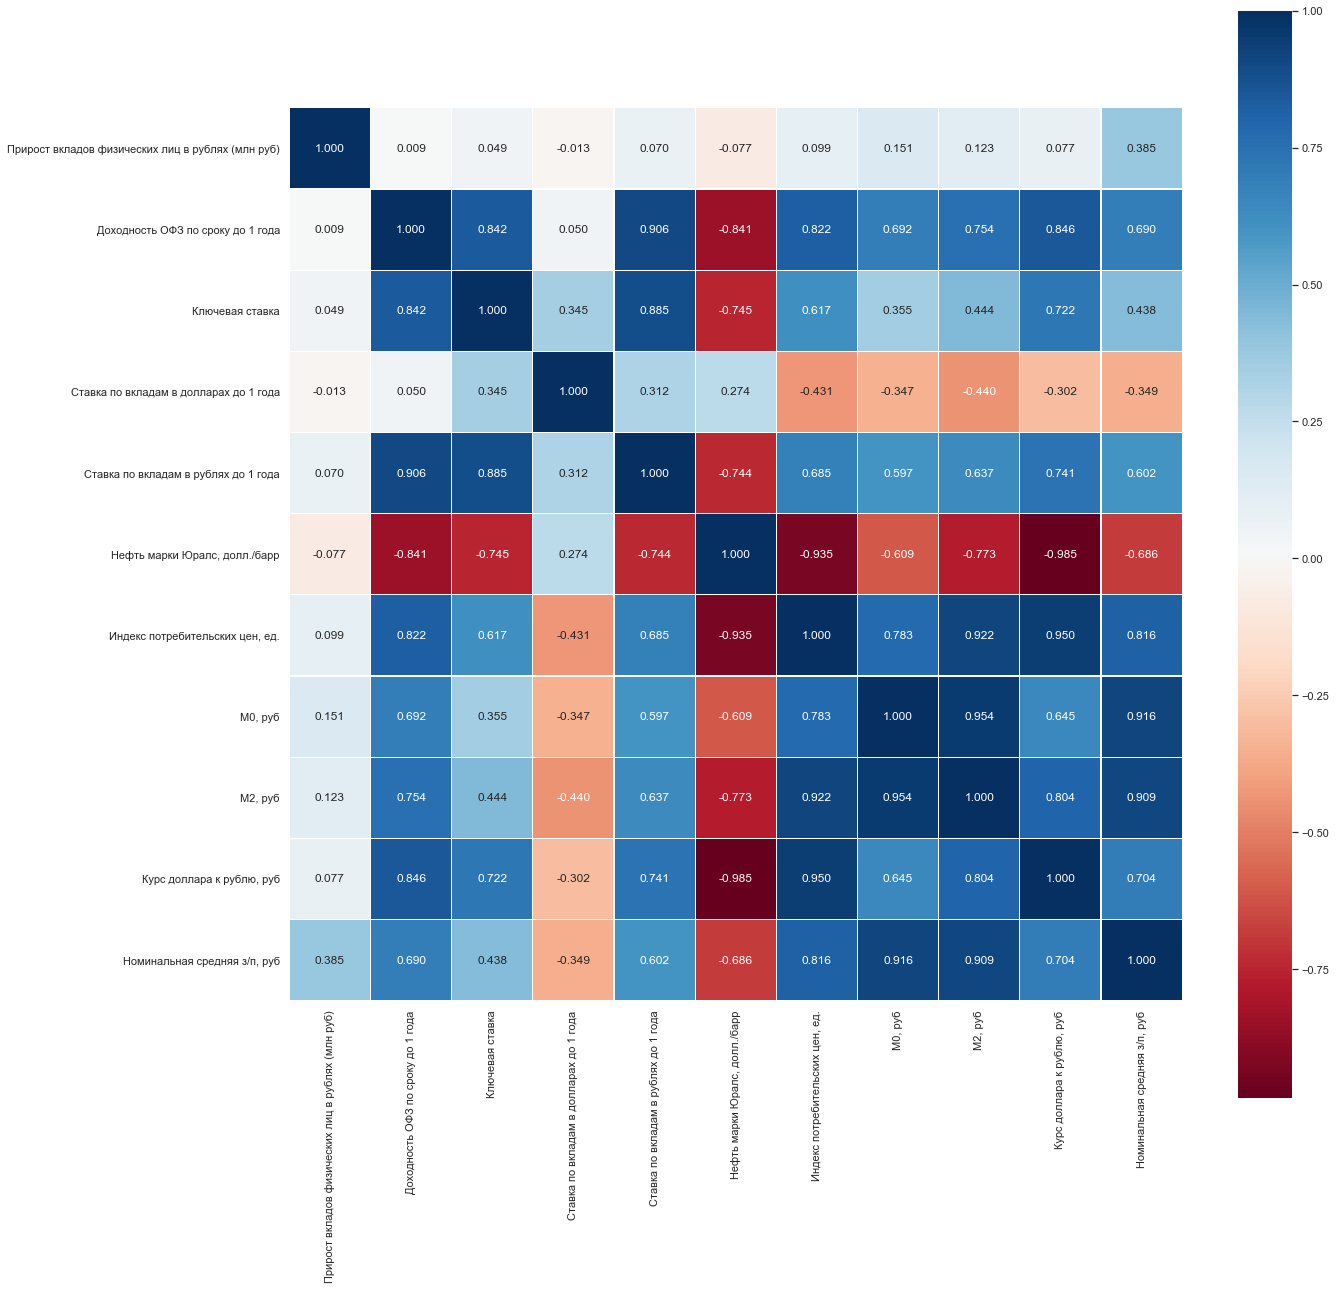

In [9]:
sns.set(font_scale=1)
plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), square=True,
            annot=True, fmt=".3f", linewidths=0.1, cmap="RdBu")

# Построение модели 

Сначала отделим таргет от признаков

In [8]:
y = df['Прирост вкладов физических лиц в рублях (млн руб)']
X = df.drop(['Прирост вкладов физических лиц в рублях (млн руб)'], axis=1)

Разбиваем выборку на обучающую и тестовую с параметрами test_size=0.30, random_state=42.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Поскольку ни для одного из показателей распределение не совсем похоже на Гауссово (гистограмма не всегда похожа на колокол) - значит StandardScaler не совсем подойдет, но и выбросов нет, соответственно и не нужно использовать RobustScalar, поэтому будем использовать MinMaxScalar для нормализации признаков

Порядок действий такой
1. Сначала выборка делится на тренировочную и тестовую.
2. Для получения масштабированной тренировочной выборки к ней применяется метод fit_transform. Он последовательно выполняет fit (устанавливает параметры скейлера), и применяет скейлер уже с этими параметрами к предоставленным данным (transform). А к тестовой выборке мы применяем метод transform. Иначе параметры скейлера будут выставлены для тестовой выборки.

In [10]:
scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)

In [11]:
X_test = scaler.transform(X_test)

## Ridge

Объявляем и обучаем модель на тренировочной выборке

руками подбирала альфа - 1, 10, 0.1, 0.5, 0.3, 0.4, 0.6, 0.7, самый хороший график и значения метрик к альфа равного 0.5. 

In [27]:
clf = Ridge()
param_grid = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 0.5, 0.1, 1, 5, 10, 20]}
grid_ridge = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_ridge.fit(X_train, y_train)
grid_ridge.best_params_

{'alpha': 0.01}

In [28]:
clf = Ridge(alpha=0.01, random_state=42)
clf.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=42, solver='auto', tol=0.001)

Делаем прогнозы на тестовой выборке

In [29]:
y_pred = clf.predict(X_test)

Строим график

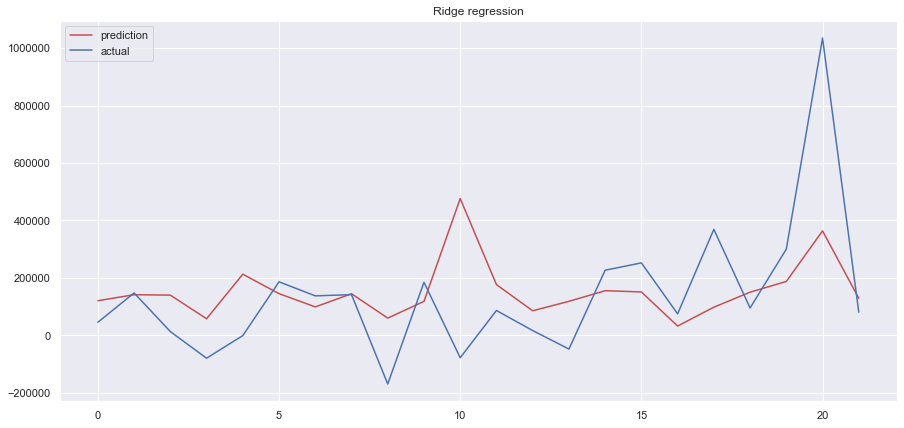

In [233]:
#альфа 0.5
plt.figure(figsize=(15, 7))
plt.plot(y_pred, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Ridge regression")
plt.grid(True);

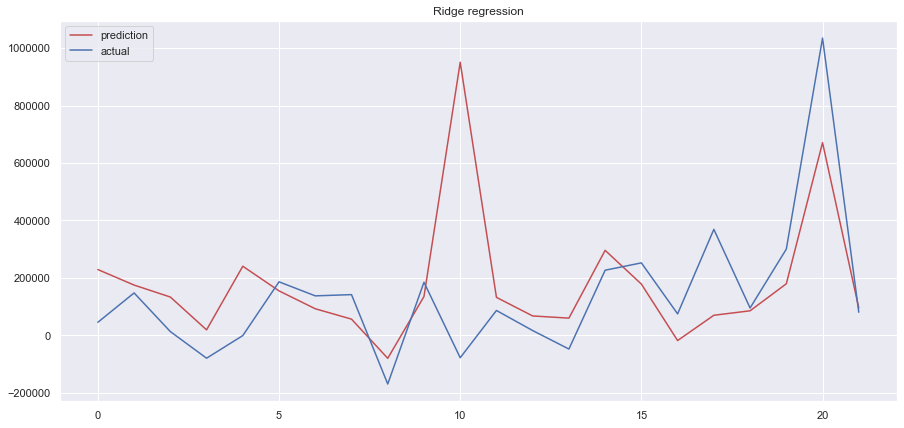

In [30]:
#альфа 0.01
plt.figure(figsize=(15, 7))
plt.plot(y_pred, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Ridge regression")
plt.grid(True);

Для более быстрого вывода сразу всех метрик качества для модели сделала функцию

In [19]:
def print_metrics(y_test, y_pred):
    print('MAE:', "%.4f" % mean_absolute_error(y_test, y_pred))
    print('RMSE:', "%.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))

In [234]:
#альфа 0.5
print_metrics(y_test, y_pred)

MAE: 144907.2275
RMSE: 218648.0519


In [31]:
#альфа 0.01
print_metrics(y_test, y_pred)

MAE: 147576.0041
RMSE: 258126.0330


Выведем коэффициенты модели, которые показывают какие признаки вносят наибольший вклад в прогноз

In [235]:
print(clf.intercept_,clf.coef_)

-7081.232271167712 [-369789.22525758  182139.70322706  218087.44987467 -112060.53511698
  -66282.81838708  -90451.3668352   -39656.0344808  -119380.17684548
  -57710.78861245  912258.72815894]


In [236]:
Importance = pd.DataFrame({"feature": X.columns,  "importance": clf.coef_})
Importance

,feature,importance
0,Доходность ОФЗ по сроку до 1 года,-369789.225258
1,Ключевая ставка,182139.703227
2,Ставка по вкладам в долларах до 1 года,218087.449875
3,Ставка по вкладам в рублях до 1 года,-112060.535117
4,"Нефть марки Юралс, долл./барр",-66282.818387
5,"Индекс потребительских цен, ед.",-90451.366835
6,"М0, руб",-39656.034481
7,"М2, руб",-119380.176845
8,"Курс доллара к рублю, руб",-57710.788612
9,"Номинальная средняя з/п, руб",912258.728159


## Lasso

руками подбирала альфа - 1, 10, 0.1, 50, 500, 5000, 10000, 6000, 5500. самый хороший график и значения метрик к альфа равного 5500

In [32]:
clf = Lasso()
param_grid = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 0.5, 0.1, 1, 5, 10, 20, 50, 500, 5000, 1000, 6000, 5500]}
grid_ridge = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_ridge.fit(X_train, y_train)
grid_ridge.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549586484008.2321, tolerance: 251168626.70880002
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425957056106.04236, tolerance: 328990245.2166
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417314205147.88196, tolerance: 283614258.61835
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384251487597.44446, tolerance: 266794902.37190998
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 539825241271.651, tolerance: 251168626.70880002
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416604778288.97797, tolerance: 328990245.2166
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

{'alpha': 1000}

In [33]:
clf = Lasso(alpha=1000.0, random_state=42)
clf.fit(X_train, y_train)

Lasso(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
y_pred = clf.predict(X_test)

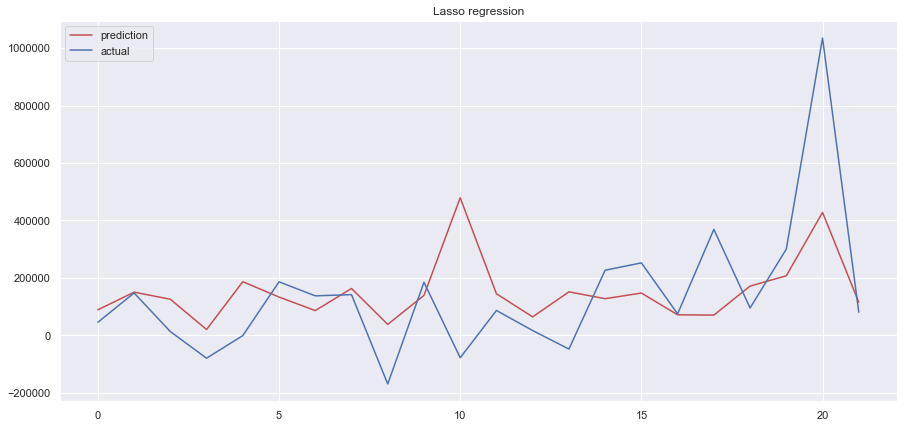

In [239]:
#альфа 5500
plt.figure(figsize=(15, 7))
plt.plot(y_pred, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Lasso regression")
plt.grid(True);

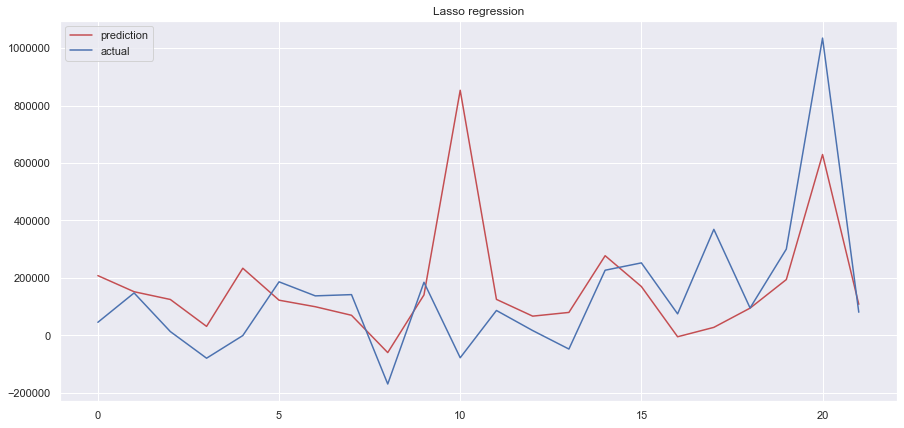

In [35]:
#альфа 1000
plt.figure(figsize=(15, 7))
plt.plot(y_pred, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Lasso regression")
plt.grid(True);

In [240]:
#альфа 5500
print_metrics(y_test, y_pred)

MAE: 136402.6251
RMSE: 208744.7937


In [36]:
#альфа 1000
print_metrics(y_test, y_pred)

MAE: 144942.4289
RMSE: 245353.8761


In [241]:
print(clf.intercept_,clf.coef_)

-31402.528610849957 [-270551.26269846       0.          135146.99386154      -0.
       0.           -4377.96385492      -0.         -367039.13390291
      -0.         1054004.94021687]


In [242]:
Importance = pd.DataFrame({"feature": X.columns,  "importance": clf.coef_})
Importance

,feature,importance
0,Доходность ОФЗ по сроку до 1 года,-2.705513e+05
1,Ключевая ставка,0.000000e+00
2,Ставка по вкладам в долларах до 1 года,1.351470e+05
3,Ставка по вкладам в рублях до 1 года,-0.000000e+00
4,"Нефть марки Юралс, долл./барр",0.000000e+00
5,"Индекс потребительских цен, ед.",-4.377964e+03
6,"М0, руб",-0.000000e+00
7,"М2, руб",-3.670391e+05
8,"Курс доллара к рублю, руб",-0.000000e+00
9,"Номинальная средняя з/п, руб",1.054005e+06


Некоторая часть коэффициентов занулилась 

## ElasticNet

руками подбирала альфа - 1, 10, 0.5, 0.1, 0.01. самый хороший график и значения метрик к альфа равного 0.01

In [42]:
regr = ElasticNet()
param_grid = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 0.01, 0.5, 0.1, 1, 5, 10, 20]}
grid_el = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_el.fit(X_train, y_train)
grid_el.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549586484008.2321, tolerance: 251168626.70880002
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425957056106.04236, tolerance: 328990245.2166
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417314205147.88196, tolerance: 283614258.61835
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190928526980.84323, tolerance: 283614258.61835
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223547380493.0403, tolerance: 296826897.03064
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245504687829.33713, tolerance: 266794902.37190998
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

{'alpha': 20}

In [38]:
regr = ElasticNet(alpha=20.0, random_state=42)
regr.fit(X_train, y_train)

ElasticNet(alpha=20.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
y_pred = regr.predict(X_test)

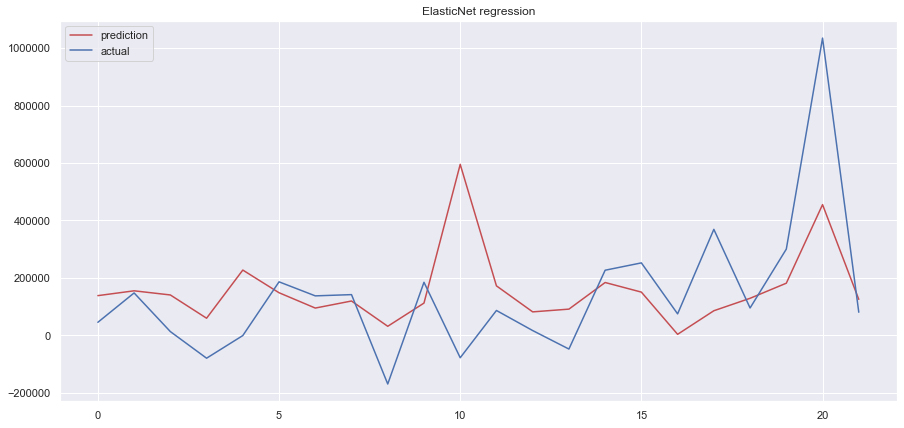

In [245]:
#альфа 0.01
plt.figure(figsize=(15, 7))
plt.plot(y_pred, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("ElasticNet regression")
plt.grid(True);

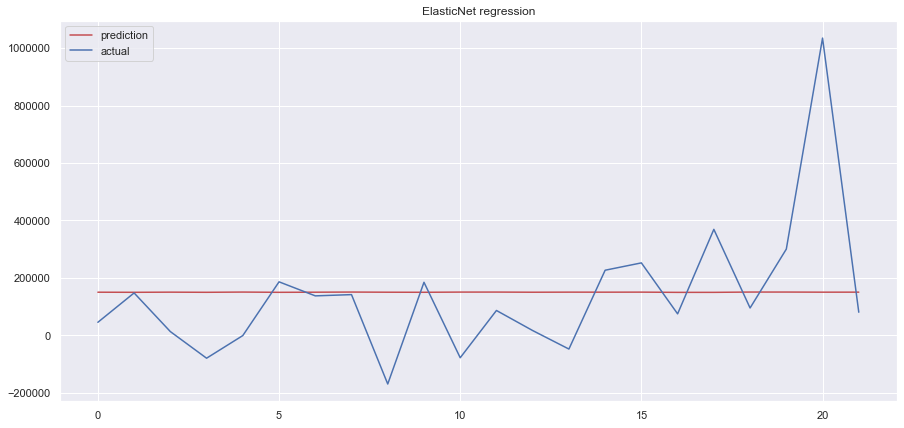

In [40]:
#альфа 20
plt.figure(figsize=(15, 7))
plt.plot(y_pred, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("ElasticNet regression")
plt.grid(True);

In [246]:
#0.01
print_metrics(y_test, y_pred)

MAE: 145789.5367
RMSE: 221467.6643


In [41]:
#альфа 20
print_metrics(y_test, y_pred)

MAE: 149597.6506
RMSE: 233993.5412


In [247]:
print(regr.intercept_,regr.coef_)

-17231.51899455322 [-525630.53373572  290527.50130604  290375.72226126 -177082.8215604
 -115488.26888295 -126516.88810608  -94792.46162742 -224361.68859505
  -35639.49755696 1278303.68136298]


In [248]:
Importance = pd.DataFrame({"feature": X.columns,  "importance": regr.coef_})
Importance

,feature,importance
0,Доходность ОФЗ по сроку до 1 года,-5.256305e+05
1,Ключевая ставка,2.905275e+05
2,Ставка по вкладам в долларах до 1 года,2.903757e+05
3,Ставка по вкладам в рублях до 1 года,-1.770828e+05
4,"Нефть марки Юралс, долл./барр",-1.154883e+05
5,"Индекс потребительских цен, ед.",-1.265169e+05
6,"М0, руб",-9.479246e+04
7,"М2, руб",-2.243617e+05
8,"Курс доллара к рублю, руб",-3.563950e+04
9,"Номинальная средняя з/п, руб",1.278304e+06


# Кросс-валидация

Используем всю выборку, так как разбиение делаем на каждом шаге заново

In [194]:
y = df['Прирост вкладов физических лиц в рублях (млн руб)']
X = df.drop(['Прирост вкладов физических лиц в рублях (млн руб)'], axis=1)

Посмотрим на качество Ридж регрессии по кросс-валидации.

In [176]:
clf = Ridge()

cv_ridge_results = cross_val_score(
    clf, X, y, cv=5, scoring='neg_mean_squared_error')
cv_ridge_results

array([-6.50119699e+10, -5.76275169e+10, -1.01740218e+11, -3.10160656e+11,
       -4.18355832e+10])

In [177]:
np.mean(np.sqrt(-1*cv_ridge_results))

315091.4742649898

Посмотрим на качество Лассо регрессии по кросс-валидации.

In [184]:
clf = Lasso()

cv_lasso_results = cross_val_score(
    clf, X, y, cv=5, scoring='neg_mean_squared_error')
cv_lasso_results

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 916266699038.9884, tolerance: 420758511.6454878
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 811387713097.7511, tolerance: 399371765.2845369
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 618916590847.382, tolerance: 358507533.20211035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

array([-6.44896096e+10, -6.07675857e+10, -1.13932372e+11, -4.76683646e+11,
       -4.46272822e+10])

In [185]:
np.mean(np.sqrt(-1*cv_lasso_results))

347934.4140313941

Посмотрим на качество Эластикнет по кросс-валидации.

In [195]:
regr = ElasticNet()

cv_el_results = cross_val_score(
    regr, X, y, cv=5, scoring='neg_mean_squared_error')
cv_el_results

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 991374355613.2864, tolerance: 420758511.6454878
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877587260690.1259, tolerance: 399371765.2845369
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 759174857853.5184, tolerance: 358507533.20211035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

array([-7.44442486e+10, -4.93395229e+10, -7.26563529e+10, -1.73031811e+11,
       -3.53509103e+10])

In [196]:
np.mean(np.sqrt(-1*cv_el_results))

273701.4952969073

# Прогноз

Убираем из df_predict таргет

In [249]:
df_predict.drop(['Прирост вкладов физических лиц в рублях (млн руб)'], axis = 1, inplace=True)

In [250]:
df_predict

,Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
Дата,,,,,,,,,,
2017-01-01,8.416190,10.00,0.79,6.50,54.89,166.434720,8.628900e+06,38016.800000,59.96,34422
2017-02-01,8.830526,10.00,0.77,6.30,55.49,166.800870,8.711600e+06,38475.200000,58.39,35497
2017-03-01,8.987727,9.75,0.80,5.91,51.97,167.017720,8.697700e+06,38555.200000,58.10,37899
2017-04-01,8.655263,9.75,0.52,6.25,53.06,167.568870,8.936600e+06,38663.800000,56.43,39225
2017-05-01,8.319500,9.25,0.76,6.10,50.87,168.188880,8.907000e+06,39222.900000,57.17,39679
2017-06-01,8.039048,9.00,0.71,5.70,46.89,169.214830,9.066500e+06,39623.100000,57.82,41454
2017-07-01,8.074286,9.00,0.66,6.07,48.50,169.333280,9.174300e+06,39275.900000,59.67,38073
2017-08-01,7.882174,9.00,0.73,6.07,52.00,168.418880,9.194600e+06,39419.300000,59.65,37099
2017-09-01,7.648095,8.50,0.66,5.31,57.00,168.166250,9.225200e+06,39571.000000,57.73,38047


In [251]:
df_predict = scaler.transform(df_predict)

Посмотрим, как будет выглядеть прогноз 

In [96]:
y2017 = clf.predict(df_predict)

In [94]:
y2017

array([-3.20297381e+11, -3.22699437e+11, -3.19961275e+11, -3.28375255e+11,
       -3.26837981e+11, -3.31683996e+11, -3.39059053e+11, -3.40780259e+11,
       -3.41165656e+11, -3.41765336e+11, -3.42752915e+11, -3.60293637e+11])

In [97]:
y2017

array([-76375.16859298, -92474.19404238,  60691.77776227, -53370.0566317 ,
       157390.81749777, 242702.50796456, -59470.2884349 , -15038.57513848,
        66930.70215135,   7951.10733064,  58494.29493746, 710248.28414446])